<a href="https://colab.research.google.com/github/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/blob/main/PWP_analysis_set2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Example using constrained GP model
This is the code used to produce the first example in the paper _'Gaussian processes with linear operator inequality constraints'_, https://arxiv.org/abs/1901.03134

In [1]:
!git clone https://github.com/cagrell/gp_plotly
!git clone https://github.com/cagrell/gp_constr
!pip install chart_studio
!pip install pyDOE

Cloning into 'gp_plotly'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 39 (delta 0), reused 2 (delta 0), pack-reused 35
Unpacking objects: 100% (39/39), done.
Cloning into 'gp_constr'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 207 (delta 0), reused 1 (delta 0), pack-reused 204
Receiving objects: 100% (207/207), 26.60 MiB | 21.17 MiB/s, done.
Resolving deltas: 100% (121/121), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.4 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=b1f42f8383eedaec7ce82fb6530884f2ffce8fd0c925bb77dfaaf0bd79110f1e
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac

In [2]:
# Load R
%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'

In [3]:
# indicate that you're running R code
%%R

# Install if it's your first time to run
install.packages("tmvtnorm") 
install.packages("TruncatedNormal")
install.packages("truncnorm")




(as ‘lib’ is unspecified)





























	‘/tmp/Rtmpr7ZLBq/downloaded_packages’

(as ‘lib’ is unspecified)












































	‘/tmp/Rtmpr7ZLBq/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpr7ZLBq/downloaded_packages’



### Imports

In [4]:
### Basic imports ###
import sys, os

# For plotting
from IPython.display import display, HTML

# This is for plotting as static images (to show on e.g. GitHub)
import plotly.io as pio
from IPython.display import Image

# Numerics
import numpy as np
import scipy as sp
import itertools
import pyDOE

### Custom files ###

dir_GPPlotly = '/content/gp_plotly'
sys.path.append(dir_GPPlotly) 

# Path to the constrained GP moule 
# can be downloaded at https://github.com/cagrell/gp_constr
dir_gp_constr = '/content/gp_constr'
sys.path.append(dir_gp_constr) 

# Import
from GPPlotly.plottingfunctions import PlotGP2d, add_traces_to_fig
from GPConstr.model import GPmodel, Constraint
from GPConstr.kern import kernel_RBF

### Setup notebook ###
print('Python version', sys.version)

Loading constrained GP module from /content


Loading R wrapper...





Attaching package: ‘TruncatedNormal’



    dtmvnorm, dtmvt, ptmvnorm, ptmvt, rtmvnorm, rtmvt



    pmvnorm, pmvt




Running R from rpy2: R version 4.2.1 (2022-06-23)
Python version 3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]


In [5]:
os.getcwd()
os.chdir('/content')

In [6]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)  

## 1. Define function for generating synthetic test/training data


In [8]:
import pandas as pd
import numpy as np
from IPython.display import clear_output

df_d = pd.read_excel('TABLE_PYTHON.xlsx') 
df_d.head()

y = df_d[['ru_end']]
X = df_d[['Qcr', 'AI','H']]
m = len(y)
n = np.size(X,1)
y = np.hstack((np.ones((m,1)),y))
X = np.hstack((np.ones((m,1)),X))
X = np.delete(X,[0],axis=1)
y = np.delete(y,[0],axis=1)
y = y.flatten()


Qcrmax = np.max(X[:,0])
Qcrmin = np.min(X[:,0])
X[:,0] = (X[:,0]-Qcrmin)/(Qcrmax-Qcrmin)
AImax = np.max(X[:,1])
AImin = np.min(X[:,1])
X[:,1] = (X[:,1]-AImin)/(AImax-AImin)
Hmax = np.max(X[:,2])
Hmin = np.min(X[:,2])
X[:,2] = (X[:,2]-Hmin)/(Hmax-Hmin)

Qcrmax_norm = np.max(X[:,0])
Qcrmin_norm = np.min(X[:,0])


AImax_norm = np.max(X[:,1])
AImin_norm = np.min(X[:,1])

Hmax_norm = np.max(X[:,2])
Hmin_norm = np.min(X[:,2])
n_plot = 20
Qcr_plot = np.linspace(Qcrmin_norm, Qcrmax_norm, n_plot)
AI_plot = np.linspace(AImin_norm, AImax_norm, n_plot)
H_plot = np.linspace(Hmin_norm, Hmax_norm, n_plot)

X_train = X
y_train = y

## 2. Regression with Gaussian noise

### 2.2. Define GP model (without constraints)

In [9]:
# Set up model
ker = kernel_RBF(variance = 0.16, lengthscale = [0.5, 0.4, 0.15 ])
model = GPmodel(kernel = ker, likelihood = 0.047, mean = 0) 

# Add the training data
model.X_training = X_train

model.Y_training = y_train
print(model)

----- GP model ----- 
 mean = 0 
 likelihood = 0.047 
 kernel: 
   type = RBF 
   input dim = 3 
   lenghtscale = [0.5  0.4  0.15] 
   variance = 0.16 
 constraint: 
   No constraints 
---------------------


In [10]:
# Optimize hyperparameters
# model.optimize(include_constraint = False, fix_likelihood = False)
print(model)

----- GP model ----- 
 mean = 0 
 likelihood = 0.047 
 kernel: 
   type = RBF 
   input dim = 3 
   lenghtscale = [0.5  0.4  0.15] 
   variance = 0.16 
 constraint: 
   No constraints 
---------------------


..Running calculation of K_w ... DONE - time: 0.003 seconds
..Running calculation of Cholesky factor for K_w ... DONE - time: 0.005 seconds
..Calculating f* | Y ... DONE - Total time: 0.014 seconds
1
..Running calculation of K_w ... SKIP - (cached)
..Running calculation of Cholesky factor for K_w ... SKIP - (cached)
..Calculating f* | Y ... DONE - Total time: 0.006 seconds
2
..Running calculation of K_w ... SKIP - (cached)
..Running calculation of Cholesky factor for K_w ... SKIP - (cached)
..Calculating f* | Y ... DONE - Total time: 0.006 seconds
3
..Running calculation of K_w ... SKIP - (cached)
..Running calculation of Cholesky factor for K_w ... SKIP - (cached)
..Calculating f* | Y ... DONE - Total time: 0.001 seconds
4
..Running calculation of K_w ... SKIP - (cached)
..Running calculation of Cholesky factor for K_w ... SKIP - (cached)
..Calculating f* | Y ... DONE - Total time: 0.001 seconds
5
..Running calculation of K_w ... SKIP - (cached)
..Running calculation of Cholesky facto

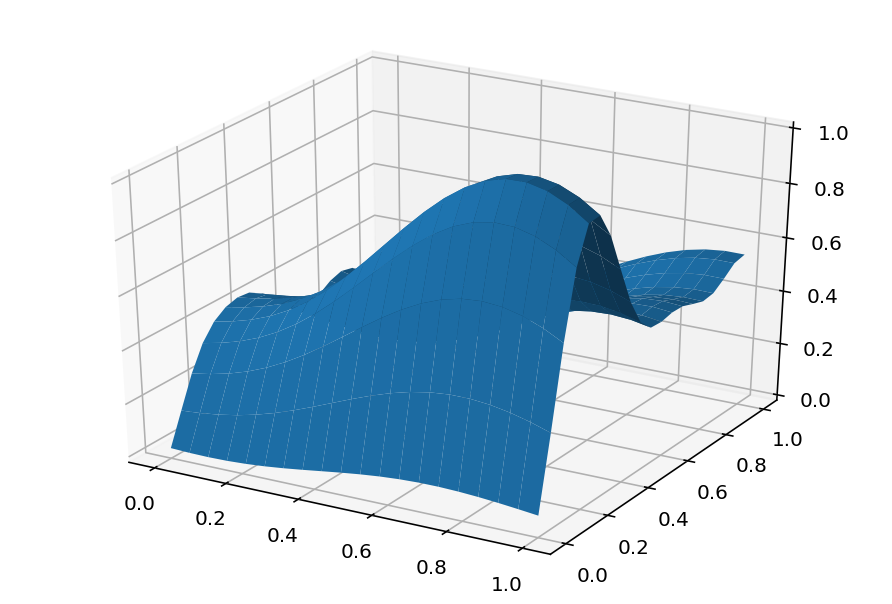

In [11]:
X, Y = np.meshgrid(AI_plot, H_plot)
Dr65 = 0.5*(np.ones((n_plot,1)))
xy = np.column_stack((Dr65,X[:,0],Y[:,0]))
Z_mean, Z_var = model.calc_posterior_unconstrained(xy, full_cov = True)
Z_std = np.diagonal(Z_var)
for i in range(1,X.shape[1]):
      print(i)
      xy = np.column_stack((Dr65,X[:,i],Y[:,i]))
      z_mean, z_var = model.calc_posterior_unconstrained(xy, full_cov = True)
      z_std = np.diagonal(Z_var)
      Z_mean = np.column_stack((Z_mean,z_mean))
      Z_std = np.column_stack((Z_std,z_std))


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

surf = ax.plot_surface(X,Y,Z_mean)
ax.set_zlim([0,1])
plt.show()




In [12]:
X, Y = np.meshgrid(Qcr_plot, H_plot)
AI = 1*(np.ones((n_plot,1)))
xy = np.column_stack((Dr65,X[:,0],Y[:,0]))
Z_mean, Z_var = model.calc_posterior_unconstrained(xy, full_cov = True)
Z_std = np.diagonal(Z_var)
for i in range(1,X.shape[1]):
      print(i)
      xy = np.column_stack((X[:,i],Dr65,Y[:,i]))
      z_mean, z_var = model.calc_posterior_unconstrained(xy, full_cov = True)
      z_std = np.diagonal(Z_var)
      Z_mean = np.column_stack((Z_mean,z_mean))
      Z_std = np.column_stack((Z_std,z_std))


..Running calculation of K_w ... SKIP - (cached)
..Running calculation of Cholesky factor for K_w ... SKIP - (cached)
..Calculating f* | Y ... DONE - Total time: 0.010 seconds
1
..Running calculation of K_w ... SKIP - (cached)
..Running calculation of Cholesky factor for K_w ... SKIP - (cached)
..Calculating f* | Y ... DONE - Total time: 0.019 seconds
2
..Running calculation of K_w ... SKIP - (cached)
..Running calculation of Cholesky factor for K_w ... SKIP - (cached)
..Calculating f* | Y ... DONE - Total time: 0.001 seconds
3
..Running calculation of K_w ... SKIP - (cached)
..Running calculation of Cholesky factor for K_w ... SKIP - (cached)
..Calculating f* | Y ... DONE - Total time: 0.028 seconds
4
..Running calculation of K_w ... SKIP - (cached)
..Running calculation of Cholesky factor for K_w ... SKIP - (cached)
..Calculating f* | Y ... DONE - Total time: 0.002 seconds
5
..Running calculation of K_w ... SKIP - (cached)
..Running calculation of Cholesky factor for K_w ... SKIP - (

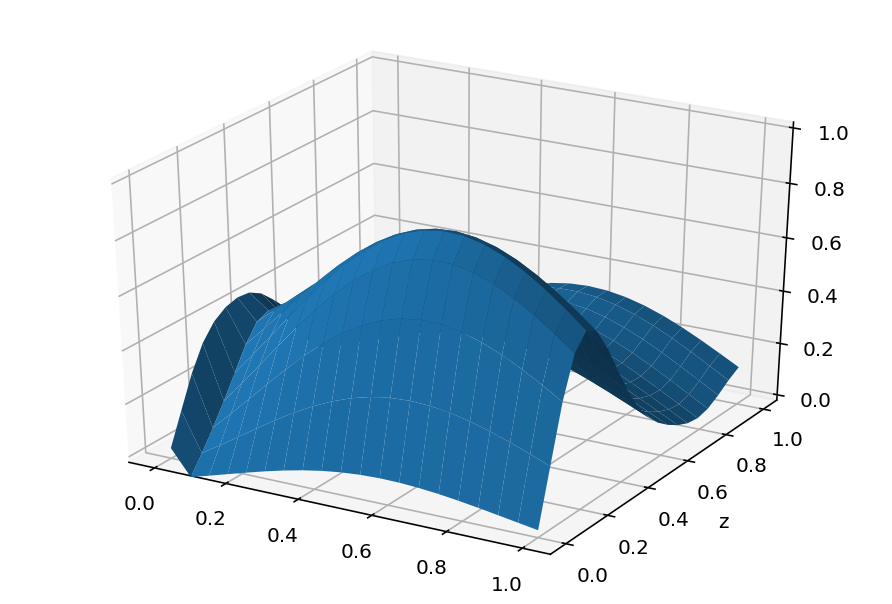

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

surf = ax.plot_surface(X,Y,Z_mean)
ax.set_zlim([0,1])
plt.ylabel('z')
plt.show()

0.19416333603449168
..Running calculation of K_w ... SKIP - (cached)
..Running calculation of Cholesky factor for K_w ... SKIP - (cached)
..Calculating f* | Y ... DONE - Total time: 0.006 seconds


(0.0, 1.2)

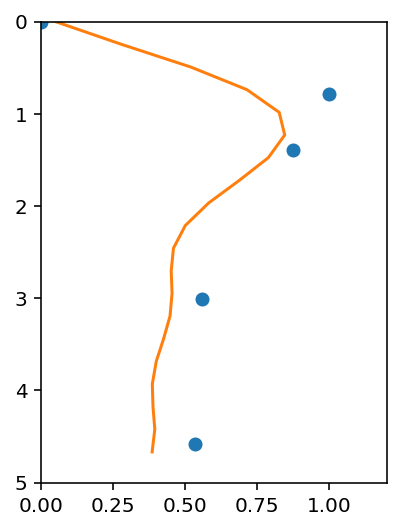

In [14]:
df1 = (df_d['Qcr']-Qcrmin)/(Qcrmax-Qcrmin)
df2 = (df_d['AI']-AImin)/(AImax-AImin)
df3 = (df_d['H']-Hmin)/(Hmax-Hmin)
df4 = df_d['ru_end']
df0 = df_d['Label']
DF = pd.concat([df0,df1,df2,df3,df4], axis=1, join='inner')

bol = DF['Label'] == "RPI12"
RPI10 = DF[bol]
print(RPI10['Qcr'].iat[0])

X, Y = np.meshgrid(AI_plot, H_plot)
Dr_exp = RPI10['Qcr'].iat[0]*(np.ones((n_plot,1)))
AI_exp = RPI10['AI'].iat[0]*(np.ones((n_plot,1)))

xy = np.column_stack((Dr_exp,AI_exp,H_plot))
Z_mean, Z_var = model.calc_posterior_unconstrained(xy, full_cov = True)
Z_std = np.diagonal(Z_var)


fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.4,0.8])
axes.plot(RPI10['ru_end'],RPI10['H']*(Hmax-Hmin)+Hmin,'o')
axes.plot(Z_mean,H_plot*(Hmax-Hmin)+Hmin)
plt.ylim(5, 0)
plt.xlim(0, 1.2)

### 2.2.3. Include constraints (boundedness and monotonicity)

In [15]:
# Helper functions for constraints
def constant_function(val):
    """ Return the constant function"""
    def fun(x):
        return np.array([val]*x.shape[0])
    
    return fun

def fun_UB(x):
    """ Upper bound function """
    #return (np.exp(x[:,2].flatten())-1) + 0.001
    return  np.tanh(10*x[:,2].flatten())
def fun_LB(x):
    """ Upper bound function """
    #return -1*(np.exp(x[:,2].flatten())-1) - 0.001
    return  -1*np.tanh(10*x[:,2].flatten())


In [16]:
# Define constraints for bounding the function and its derivative
constr_bounded = Constraint(LB = fun_LB, UB = fun_UB)
#constr_deriv = Constraint(LB = constant_function(0), UB = constant_function(float('Inf')))

In [17]:
# Add constraints to model
model.constr_bounded = constr_bounded
#model.constr_deriv = [constr_deriv] # Add list of constraints for multi-dimensional functions
model.constr_likelihood = 0.0005

print(model)


----- GP model ----- 
 mean = 0 
 likelihood = 0.047 
 kernel: 
   type = RBF 
   input dim = 3 
   lenghtscale = [0.5  0.4  0.15] 
   variance = 0.16 
 constraint: 
   f [0] 
   constr_likelihood = 0.0005 
---------------------


In [18]:
Omega = np.random.uniform(size = (1000, 3))
df, num_pts, pc_min = model.find_XV_subop(p_target = 0.9, Omega = Omega, sampling_alg = 'minimax_tilting', num_samples = 10,
                         max_iterations = 1, print_intermediate = False)

# Then we run multiple iterations with p_target = 0.7 
Omega = np.random.uniform(size = (1000, 3)) # Candidate set
df, num_pts, pc_min = model.find_XV_subop(p_target = 0.9, Omega = Omega, sampling_alg = 'minimax_tilting', num_samples = 10,
                         max_iterations = 50, print_intermediate = False)

model.constrprob_Xv(n = 1000)


Searching for points XV s.t. P(a - nu < Lf < b + nu) > p_target = 0.9 for Lf = [f] and nu = 0.0006407757827723002 ...
DONE - Found 1 points. Min. constraint prob = 0.02420406544183229. Total time spent = 0.095 seconds
Searching for points XV s.t. P(a - nu < Lf < b + nu) > p_target = 0.9 for Lf = [f] and nu = 0.0006407757827723002 ...
DONE - Found 45 points. Min. constraint prob = 0.9017607704204668. Total time spent = 2.769 seconds


9.597387383304394e-23

## OUTLIER ANALYSIS

In [72]:


Z_mean, Z_var, perc, mode, samples, sampling_time  = \
model.calc_posterior_constrained(X_train, compute_mode = False, num_samples = 1000, \
save_samples = 1, algorithm = 'minimax_tilting', resample = False)

mean = np.zeros((len(Z_mean)))
mean[:]= Z_mean.flatten()


..Running calculation of K_w ... SKIP - (cached)
..Running calculation of Cholesky factor for K_w ... SKIP - (cached)
..Running preparation step 1 - dependence on (XS, X) ... DONE - time: 0.004 seconds
..Running preparation step 2 - dependence on (XV, X) ... SKIP - (cached)
..Running preparation step 3 - dependence on (XS, XV, X) ... DONE - time: 0.003 seconds
..using old samples from truncated constraint distribution C~|C, Y
..sampling 1000 times from constrained GP f*|C, Y DONE - time: 0.011 seconds
..computing statistics from samples DONE - time: 0.005 seconds
 DONE - Total time: 0.034 seconds


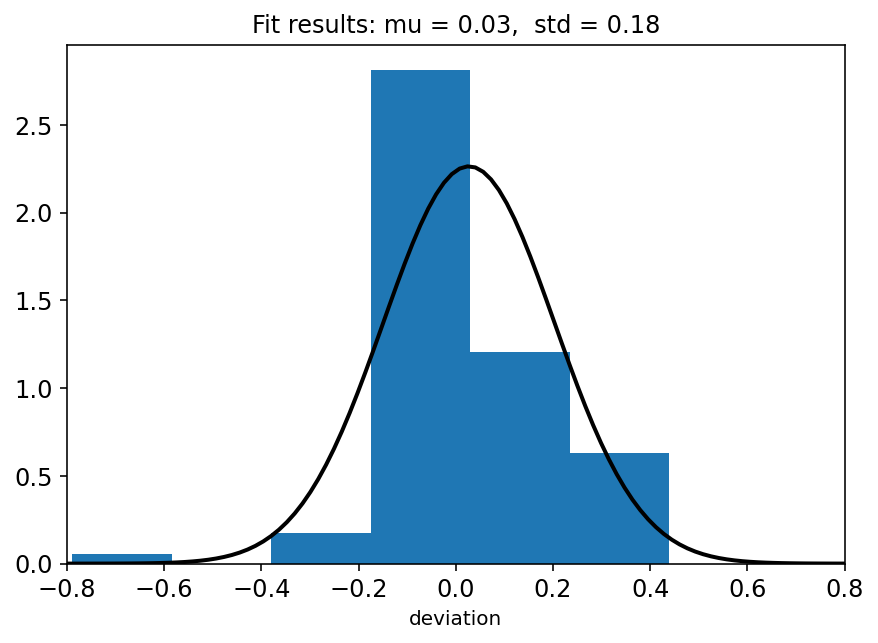

In [73]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
# Fit a normal distribution to the data:
dev = y_train - mean
mu, std = norm.fit(dev)
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.9,0.9])
# Plot the histogram.
plt.hist(dev, bins=6, density=True, alpha=1)
# Plot the PDF.
axes.set_xlabel('deviation')
axes.set_xlim([-0.8,0.8])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

(-6.0, 6.0)

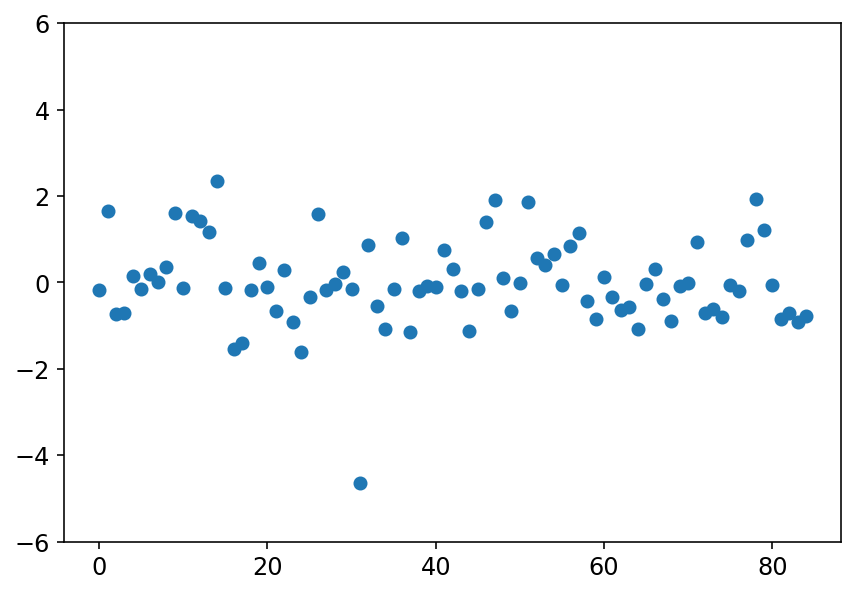

In [74]:
zscore=2;
zscoredata=(dev-mu)/std

fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.9,0.9])
# Plot the histogram.
axes.plot(zscoredata,'o')
axes.set_ylim([-6,6])

In [83]:
bol= np.absolute(zscoredata)<=2
print(df_d.iloc[np.logical_not(bol),:])
X_train_z = X_train[bol,:]
y_train_z = y_train[bol]
DF['marker'] = DF['ru_end']
for i in range(0,len(bol),1):
  if bol[i] == True:  
      DF['marker'][i] = 'o'
  else:
      DF['marker'][i] = 'x'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [77]:
# Set up model
ker = kernel_RBF(variance = 0.16, lengthscale = [0.5, 0.4, 0.15 ])
model = GPmodel(kernel = ker, likelihood = 0.047, mean = 0) 

# Add the training data
model.X_training = X_train_z

model.Y_training = y_train_z
print(model)

----- GP model ----- 
 mean = 0 
 likelihood = 0.047 
 kernel: 
   type = RBF 
   input dim = 3 
   lenghtscale = [0.5  0.4  0.15] 
   variance = 0.16 
 constraint: 
   No constraints 
---------------------


In [78]:
# Add constraints to model
model.constr_bounded = constr_bounded
#model.constr_deriv = [constr_deriv] # Add list of constraints for multi-dimensional functions
model.constr_likelihood = 0.0005

print(model)


----- GP model ----- 
 mean = 0 
 likelihood = 0.047 
 kernel: 
   type = RBF 
   input dim = 3 
   lenghtscale = [0.5  0.4  0.15] 
   variance = 0.16 
 constraint: 
   f [97] 
   constr_likelihood = 0.0005 
---------------------


In [79]:
Omega = np.random.uniform(size = (1000, 3))
df, num_pts, pc_min = model.find_XV_subop(p_target = 0.9, Omega = Omega, sampling_alg = 'minimax_tilting', num_samples = 10,
                         max_iterations = 1, print_intermediate = False)

# Then we run multiple iterations with p_target = 0.7 
Omega = np.random.uniform(size = (1000, 3)) # Candidate set
df, num_pts, pc_min = model.find_XV_subop(p_target = 0.9, Omega = Omega, sampling_alg = 'minimax_tilting', num_samples = 10,
                         max_iterations = 50, print_intermediate = False)

model.constrprob_Xv(n = 1000)


Searching for points XV s.t. P(a - nu < Lf < b + nu) > p_target = 0.9 for Lf = [f] and nu = 0.0006407757827723002 ...
DONE - Found 1 points. Min. constraint prob = 0.06664142062771329. Total time spent = 0.201 seconds
Searching for points XV s.t. P(a - nu < Lf < b + nu) > p_target = 0.9 for Lf = [f] and nu = 0.0006407757827723002 ...
DONE - Found 50 points. Min. constraint prob = 0.33239392145494. Total time spent = 9.768 seconds


5.550235996665653e-198

In [87]:
from sklearn.metrics import r2_score

Z_mean, Z_var, perc, mode, samples, sampling_time  = \
model.calc_posterior_constrained(X_train_z, compute_mode = False, num_samples = 1000, \
save_samples = 1, algorithm = 'minimax_tilting', resample = False)
r2_after = r2_score(y_train_z, Z_mean)

Z_mean, Z_var, perc, mode, samples, sampling_time  = \
model.calc_posterior_constrained(X_train, compute_mode = False, num_samples = 1000, \
save_samples = 1, algorithm = 'minimax_tilting', resample = False)
r2_bef = r2_score(y_train, Z_mean)
clear_output(wait=True)

print('R2 before removing outliers is equal to ',r2_bef)
print('R2 after removing outliers is equal to ',r2_after)






R2 before removing outliers is equal to  0.6732890009799937
R2 after removing outliers is equal to  0.819022611131893


# PLOTTING 

In [ ]:
def exp_plotter(Test,DF,nr,nc):
    
    bol = DF['Label'] == Test
    RPI10 = DF[bol].reset_index(drop=True)

    Dr_exp = RPI10['Qcr'].iat[0]*(np.ones((n_plot,1)))
    AI_exp = RPI10['AI'].iat[0]*(np.ones((n_plot,1)))

    xy = np.column_stack((Dr_exp,AI_exp,H_plot))
    Z_mean, Z_var, perc, mode, samples, sampling_time  = \
    model.calc_posterior_constrained(xy, compute_mode = False, num_samples = 1000, \
    save_samples = 1, algorithm = 'minimax_tilting', resample = False)


    mean = np.zeros((len(Z_mean)))
    error1 = np.zeros((len(Z_mean)))
    error2 = np.zeros((len(Z_mean)))

    mean[:]= Z_mean.flatten()
    error1[:] = (Z_mean + np.sqrt(Z_var)).flatten()
    error2[:] = (Z_mean - np.sqrt(Z_var)).flatten() 
    H = H_plot*(Hmax-Hmin)+Hmin
    axes[nr,nc].fill_betweenx(H, error1, error2,alpha=0.2,color='blue')
    for i in range(0,RPI10.shape[0],1):
      axes[nr,nc].plot(RPI10['ru_end'][i],RPI10['H'][i]*(Hmax-Hmin)+Hmin,RPI10['marker'][i],color='white',markersize=4, markeredgecolor="blue", linewidth=2)
    axes[nr,nc].plot(Z_mean,H,color='blue',linewidth=1.5)
    axes[nr,nc].set_ylim(4.99999, 0)
    axes[nr,nc].set_xlim(-0.199999, 1.199999)
    axes[nr,nc].text(0.8,0.7,Test,fontdict={  'fontsize': 7, 'fontname': 'serif'})
    axes[nr,nc].set_xticks(np.arange(0, 1.25, 0.25))
    axes[nr,nc].set_yticks(np.arange(0.0001, 5, 1))
    if nc == 1 or nc == 2 or nc == 3:
        for tic in axes[nr,nc].yaxis.get_major_ticks():
            tic.tick1On = tic.tick2On = False
    axes[nr,nc].grid(alpha=0.1)
    for tick in axes[nr,nc].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(7)
    for tick in axes[nr,nc].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(7)

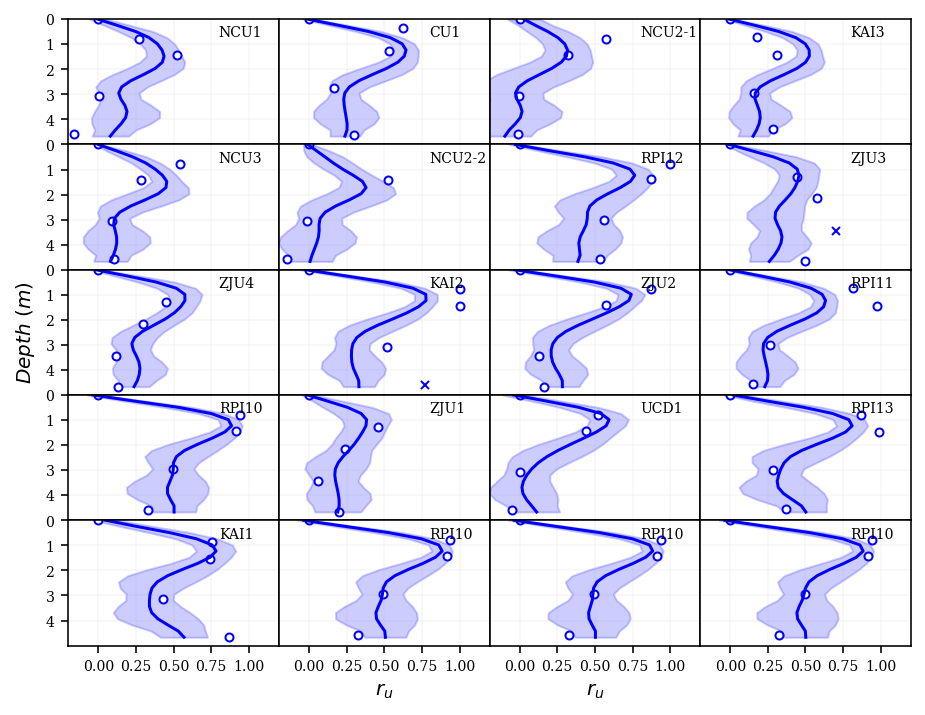

In [ ]:
fig,axes = plt.subplots(nrows=5,ncols=4,figsize=(6.5,5))
fig.subplots_adjust(wspace=0,hspace=0,left=0.08, right=0.98, top=0.97, bottom=0.1)
fontdict={  'fontsize': 10, 'fontname': 'serif'}

exp_plotter('NCU1',DF,0,0)
exp_plotter('CU1',DF,0,1)
exp_plotter('NCU2-1',DF,0,2)
exp_plotter('KAI3',DF,0,3)
exp_plotter('NCU3',DF,1,0)
exp_plotter('NCU2-2',DF,1,1)
exp_plotter('RPI12',DF,1,2)
exp_plotter('ZJU3',DF,1,3)
exp_plotter('ZJU4',DF,2,0)
exp_plotter('KAI2',DF,2,1)
exp_plotter('ZJU2',DF,2,2)
exp_plotter('RPI11',DF,2,3)
exp_plotter('RPI10',DF,3,0)
exp_plotter('ZJU1',DF,3,1)
exp_plotter('UCD1',DF,3,2)
exp_plotter('RPI13',DF,3,3)
exp_plotter('KAI1',DF,4,0)
exp_plotter('RPI10',DF,4,1)
exp_plotter('RPI10',DF,4,2)
exp_plotter('RPI10',DF,4,3)
axes[4,1].set_xlabel('$r_{u}$', fontdict)
axes[4,2].set_xlabel('$r_{u}$', fontdict)
axes[2,0].set_ylabel('$Depth$ $(m)$', fontdict)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()

OutFile_Name = 'ru_Profile_1.png'
fig.savefig(OutFile_Name, dpi=300, facecolor='w', edgecolor='k',
		orientation='portrait',  format='png',)
clear_output(wait=True)


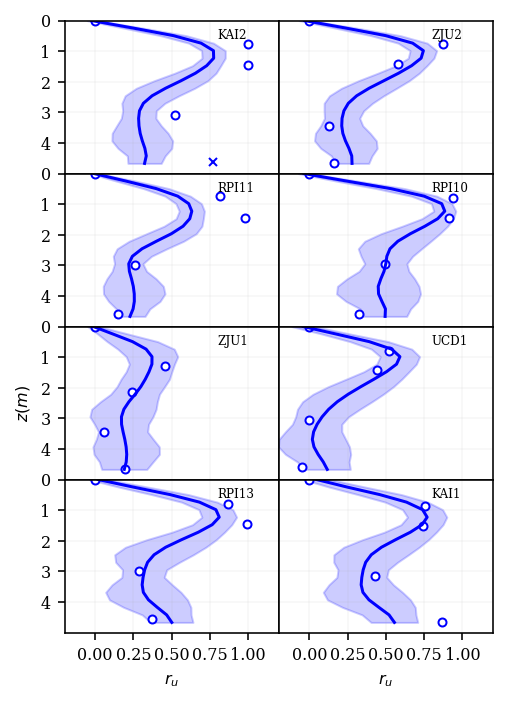

In [ ]:
fig,axes = plt.subplots(nrows=4,ncols=2,figsize=(3.5,5))
fig.subplots_adjust(wspace=0,hspace=0,left=0.15, right=0.95, top=0.95, bottom=0.1)
fontdict={  'fontsize': 10, 'fontname': 'serif'}



axes[3,0].set_xlabel('$r_{u}$', fontdict)
axes[3,1].set_xlabel('$r_{u}$', fontdict)
axes[2,0].set_ylabel('$z (m)$', fontdict)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()

OutFile_Name = 'ru_Profile_2.png'
fig.savefig(OutFile_Name, dpi=300, facecolor='w', edgecolor='k',
		orientation='portrait',  format='png',)
clear_output(wait=True)


In [ ]:
# load package
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 
(mpl.rcParams.keys) # just a dictionary

# 305

In [93]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def D3_plotter():

  ax = fig.add_axes([0.05,0.1,0.95,0.9], projection='3d')
  fts=10


  mpl.rc('xtick', labelsize=12) 
  mpl.rc('ytick', labelsize=12) 
  surf = ax.plot_surface(X_plot,Y_plot,Z_mean,cmap=parula_map)

  ax.set_zlim([0,1])
  ax.set_xlabel('\n$AI^{Lat}_{1Hz}$',fontsize=fts+2, linespacing=1)
  ax.set_ylabel('\n$z (m)$',fontsize=fts+2, linespacing=1)
  ax.set_zlabel('\n$r_{u}$',fontsize=fts+2, linespacing=1)
  ax.dist = 10
  ax.xaxis._axinfo['label']['space_factor'] = 5
  #fig.subplots_adjust(wspace=0.25, hspace=0.125, left=0.115, right=0.975, top=0.9, bottom=0.17,)
  ax.text(1.8,0.8,1.2,title_txt, fontsize=10,fontname='serif')
  ax.view_init(elev=30, azim=200)
#  jj=0
#  for ii in range(0,360,10):
#        jj=jj+1
#        ax.view_init(elev=35., azim=ii)
#        fig.savefig("bb%d.png" % jj)

  for tick in ax.get_xticklabels():
          tick.set_fontname("serif")
          tick.set_fontsize(fts)
  for tick in ax.get_yticklabels():
          tick.set_fontname("serif")
          tick.set_fontsize(fts)
  for tick in ax.get_zticklabels():
          tick.set_fontname("serif")
          tick.set_fontsize(fts)




In [55]:
AImax_norm

1.0

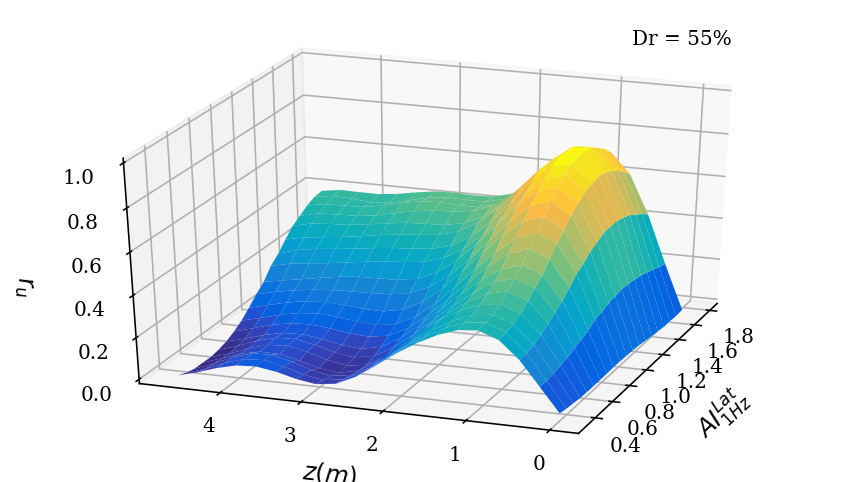

In [94]:
AI_plot = np.linspace(AImin_norm+0, AImax_norm, n_plot)
X, Y = np.meshgrid(AI_plot, H_plot)
Dr_test = ((71-Qcrmin)/(Qcrmax-Qcrmin))*(np.ones((n_plot,1)))
title_txt = 'Dr = 55%'
xy = np.column_stack((Dr_test,X[:,0],Y[:,0]))
Z_mean, Z_var, perc, mode, samples, sampling_time  = \
model.calc_posterior_constrained(xy, compute_mode = False, num_samples = 1000, \
save_samples = 30, algorithm = 'minimax_tilting', resample = False)

for i in range(1,X.shape[1]):
      print(i)
      xy = np.column_stack((Dr_test,X[:,i],Y[:,i]))
      z_mean, z_var, perc, mode, samples, sampling_time  = \
      model.calc_posterior_constrained(xy, compute_mode = False, num_samples = 1000, \
      save_samples = 30, algorithm = 'minimax_tilting', resample = False);
      
      Z_mean = np.column_stack((Z_mean,z_mean))
      Z_var = np.column_stack((Z_var,z_var))

clear_output(wait=True)
X_plot = (X*(AImax-AImin)) + AImin
Y_plot = (Y*(Hmax-Hmin)) + Hmin
fig = plt.figure(figsize=(6,3.5))
D3_plotter()
OutFile_Name = '3D_Dr_55.png'
fig.savefig(OutFile_Name, dpi=300, facecolor='w', edgecolor='k',
		orientation='portrait',  format='png',)
clear_output(wait=True)

In [ ]:
os.getcwd()

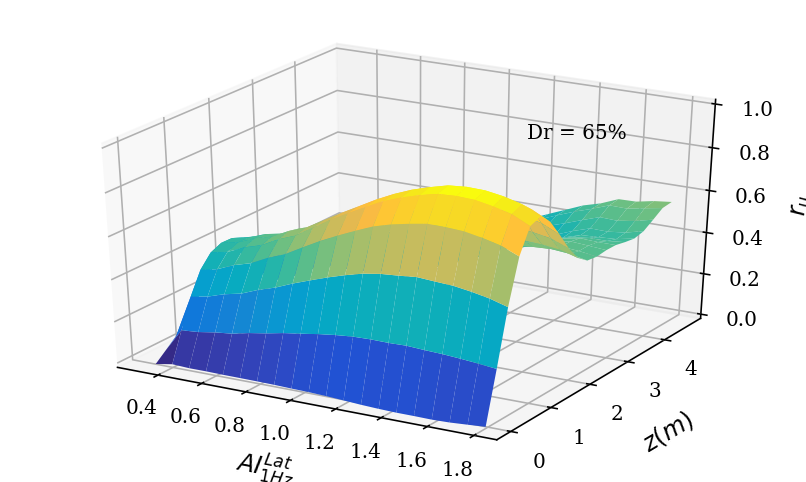

In [ ]:
X, Y = np.meshgrid(Qcr_plot, H_plot)
Dr55 = ((112-Qcrmin)/(Qcrmax-Qcrmin))*(np.ones((n_plot,1)))
title_txt = 'Dr = 65%'
xy = np.column_stack((X[:,0],Dr65,Y[:,0]))
Z_mean, Z_var, perc, mode, samples, sampling_time  = \
model.calc_posterior_constrained(xy, compute_mode = False, num_samples = 1000, \
save_samples = 30, algorithm = 'minimax_tilting', resample = False)

for i in range(1,X.shape[1]):
      print(i)
      xy = np.column_stack((Dr65,X[:,i],Y[:,i]))
      z_mean, z_var, perc, mode, samples, sampling_time  = \
      model.calc_posterior_constrained(xy, compute_mode = False, num_samples = 1000, \
      save_samples = 30, algorithm = 'minimax_tilting', resample = False)
      
      Z_mean = np.column_stack((Z_mean,z_mean))
      Z_var = np.column_stack((Z_var,z_var))

clear_output(wait=True)
D3_plotter()


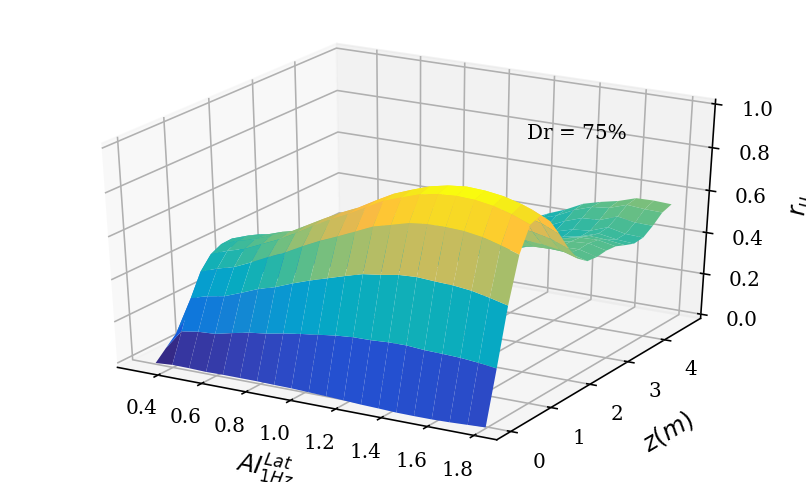

In [ ]:
X, Y = np.meshgrid(Qcr_plot, H_plot)
Dr55 = ((161-Qcrmin)/(Qcrmax-Qcrmin))*(np.ones((n_plot,1)))
title_txt = 'Dr = 75%'
xy = np.column_stack((X[:,0],Dr65,Y[:,0]))
Z_mean, Z_var, perc, mode, samples, sampling_time  = \
model.calc_posterior_constrained(xy, compute_mode = False, num_samples = 1000, \
save_samples = 30, algorithm = 'minimax_tilting', resample = False)

for i in range(1,X.shape[1]):
      print(i)
      xy = np.column_stack((Dr65,X[:,i],Y[:,i]))
      z_mean, z_var, perc, mode, samples, sampling_time  = \
      model.calc_posterior_constrained(xy, compute_mode = False, num_samples = 1000, \
      save_samples = 30, algorithm = 'minimax_tilting', resample = False)
      
      Z_mean = np.column_stack((Z_mean,z_mean))
      Z_var = np.column_stack((Z_var,z_var))

clear_output(wait=True)
D3_plotter()


In [ ]:
!zip -r /content/movie102.zip /content